In [2]:
#!pip install git+https://github.com/aimclub/FEDOT.git

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [6]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp']['value'].to_numpy()
ts_real_traffic = ts_tabular[ts_tabular['label']=='traffic_volume'].to_numpy()
ts_real_oil = ts_tabular[ts_tabular['label']=='Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)']['value'].to_numpy()
#ts_tabular.label.value_counts()

FileNotFoundError: ignored

In [3]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans


def s7(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1+r*np.sin(np.pi*r/48)/np.log(r+2)
    noise_coeff = np.log(r+1)
    noise = np.random.normal(loc=0,scale = noise_coeff*noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

In [4]:
horizon = 100
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 1000
end = 2000
series = 7

if series == 'oil':
  init_series = ts_real_oil
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'traffic':
  init_series = ts_real_traffic
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'temp':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]  
    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
  
if series ==5:
    noise = 1
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]   

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]



if series ==7:
    noise = 1
    init_series = s7(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
 
idx = np.array( range(len(np.array(ts))) )
train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=5,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

In [5]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)

DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


2022-12-01 18:45:07,113 - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-12-01 18:45:07,332 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-12-01 18:45:07,337 - Creating converter from 5 to 7


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-12-01 18:45:07,343 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-12-01 18:45:07,351 - Creating converter from 5 to 7


DEBUG:root:Initializing MLIR with module: _site_initialize_0


2022-12-01 18:45:07,985 - Initializing MLIR with module: _site_initialize_0


DEBUG:root:Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.8/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


2022-12-01 18:45:07,997 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.8/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.


2022-12-01 18:45:08,138 - etils.epath found. Using etils.epath for file I/O.


INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


2022-12-01 18:45:09,070 - 'pattern' package not found; tag filters are not available for English


INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-12-01 18:45:09,323 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 18:45:09,333 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 18:45:09,338 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 18:45:09,342 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 18:45:09,346 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-12-01 18:45:09,349 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-12-01 18:45:09,593 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 18:45:09,955 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 18:45:09,964 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 18:45:09,975 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 18:45:09,986 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 18:45:10,002 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-12-01 18:45:10,027 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-12-01 18:45:10,055 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.7 sec.


2022-12-01 18:45:10,060 - ApiComposer - Initial pipeline was fitted in 0.7 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['dtreg', 'cut', 'diff_filter', 'polyfit', 'smoothing', 'arima', 'adareg', 'scaling', 'stl_arima', 'gaussian_filter', 'ts_naive_average', 'ar', 'locf', 'normalization', 'pca', 'sparse_lagged', 'lasso', 'ridge', 'lagged', 'fast_ica', 'sgdr', 'linear', 'glm', 'ets'].


2022-12-01 18:45:10,088 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['dtreg', 'cut', 'diff_filter', 'polyfit', 'smoothing', 'arima', 'adareg', 'scaling', 'stl_arima', 'gaussian_filter', 'ts_naive_average', 'ar', 'locf', 'normalization', 'pca', 'sparse_lagged', 'lasso', 'ridge', 'lagged', 'fast_ica', 'sgdr', 'linear', 'glm', 'ets'].


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-12-01 18:45:10,098 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-12-01 18:45:10,104 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 18:45:10,120 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-12-01 18:45:19,037 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=87.886 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 18:45:19,052 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=87.886 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 18:45:21,068 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-12-01 18:46:15,742 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=79.650 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 18:46:15,749 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=79.650 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - Next population size: 21; max graph depth: 5


2022-12-01 18:46:15,754 - EvoGraphOptimizer - Next population size: 21; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 18:46:16,381 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-12-01 18:46:59,375 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=79.650 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 18:46:59,385 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=79.650 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-12-01 18:46:59,392 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.8 min


2022-12-01 18:46:59,398 - EvoGraphOptimizer - spent time: 1.8 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-12-01 18:46:59,407 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 18:47:00,047 - MultiprocessingDispatcher - Number of used CPU's: 2
2022-12-01 18:47:21,274 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=75.263 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 18:47:21,281 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=75.263 ComplexityMetricsEnum.node_num=0.400>']


CRITICAL:root:GroupedCondition - Optimisation stopped: Max number of generations reached


2022-12-01 18:47:21,285 - GroupedCondition - Optimisation stopped: Max number of generations reached


Generations:  33%|███▎      | 1/3 [02:11<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 2.186 min


2022-12-01 18:47:21,291 - OptimisationTimer - Composition time: 2.186 min


INFO:root:EvoGraphOptimizer - Generation num: 5


2022-12-01 18:47:21,295 - EvoGraphOptimizer - Generation num: 5


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=75.263 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 18:47:21,299 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=75.263 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-12-01 18:47:21,302 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.2 min


2022-12-01 18:47:21,305 - EvoGraphOptimizer - spent time: 2.2 min


INFO:root:GPComposer - GP composition finished


2022-12-01 18:47:21,311 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-12-01 18:47:21,716 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-12-01 18:47:22,145 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}


2022-12-01 18:47:22,152 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 18:47:22,167 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 18:47:22,175 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 18:47:22,195 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 18:47:22,206 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: sparse_lagged


2022-12-01 18:47:22,221 - PrimaryNode - Predict in primary node by operation: sparse_lagged


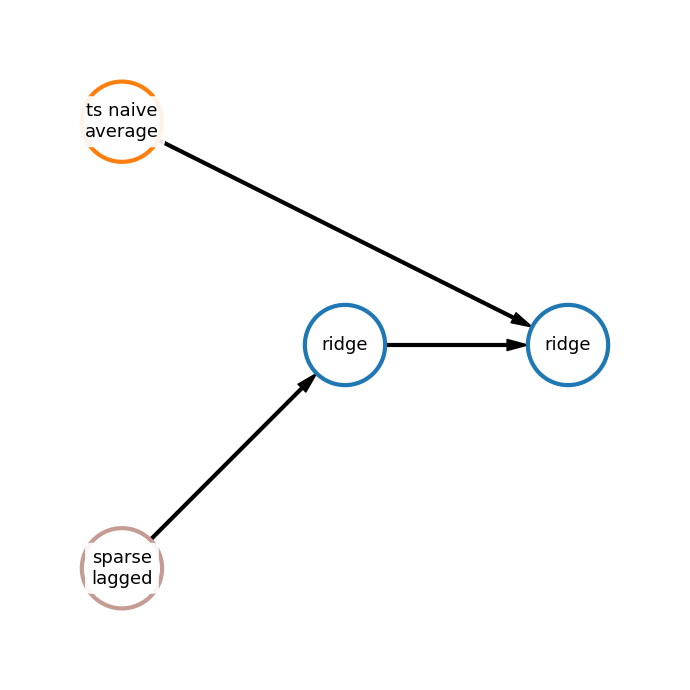

In [6]:
pipeline.show()

In [129]:
#!pip install matplotlib==3.1.3

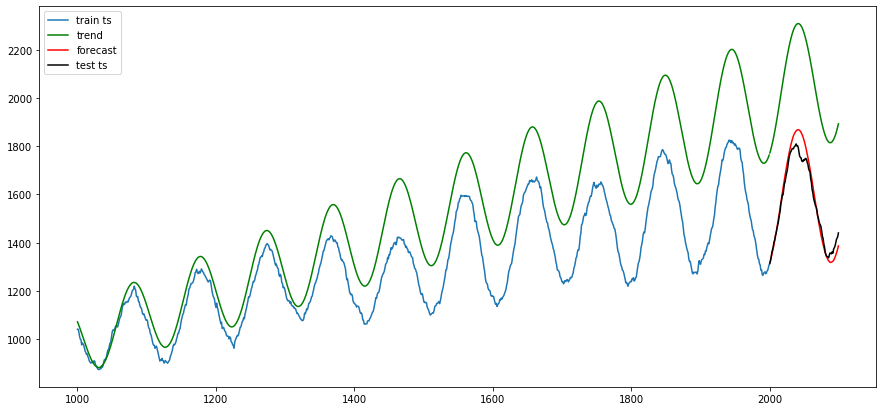

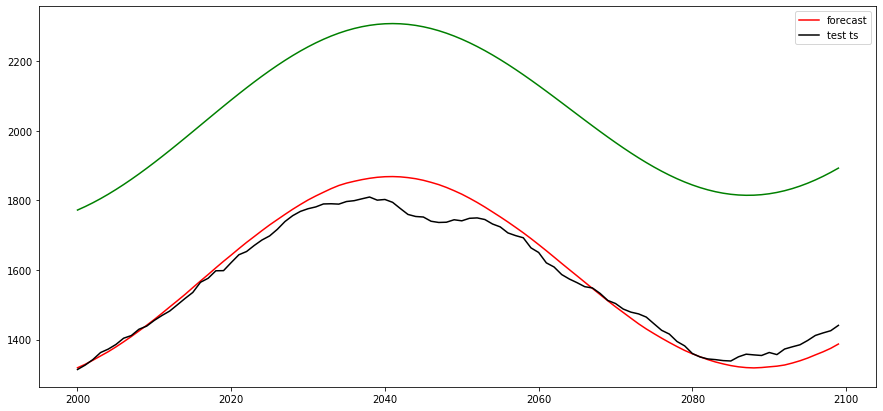

In [7]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [8]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [9]:
#importing for tuning

from fedot.core.pipelines.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 18:50:01,429 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 18:50:01,437 - DataSourceSplitter - Hold out validation is applied.


In [10]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [11]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-2]:
         fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))
    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-2]: #[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [12]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

Fitting pipeline №1


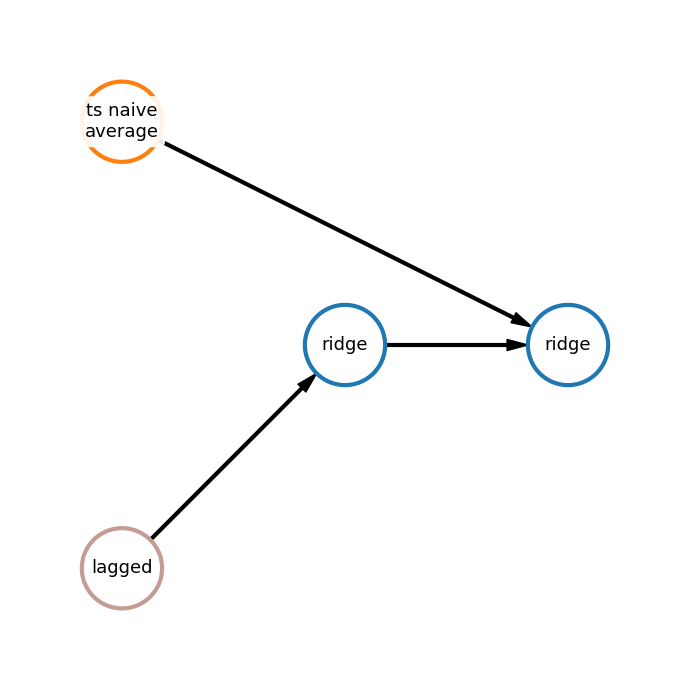

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:50:23,865 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659


2022-12-01 18:50:24,266 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002397 seconds


2022-12-01 18:50:24,299 - build_posterior_wrapper took 0.002397 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:50:24,317 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002225 seconds


2022-12-01 18:50:24,749 - build_posterior_wrapper took 0.002225 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 67.659179


2022-12-01 18:50:24,759 - TPE using 1/1 trials with best loss 67.659179
 20%|██        | 2/10 [00:00<00:04,  1.68trial/s, best loss: 59.26841059842354]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002430 seconds


2022-12-01 18:50:25,347 - build_posterior_wrapper took 0.002430 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 59.268411


2022-12-01 18:50:25,352 - TPE using 2/2 trials with best loss 59.268411
 30%|███       | 3/10 [00:01<00:04,  1.42trial/s, best loss: 59.26841059842354]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003955 seconds


2022-12-01 18:50:26,125 - build_posterior_wrapper took 0.003955 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 59.268411


2022-12-01 18:50:26,131 - TPE using 3/3 trials with best loss 59.268411
 40%|████      | 4/10 [00:02<00:06,  1.01s/trial, best loss: 38.32147173216497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002937 seconds


2022-12-01 18:50:27,507 - build_posterior_wrapper took 0.002937 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 38.321472


2022-12-01 18:50:27,515 - TPE using 4/4 trials with best loss 38.321472
 50%|█████     | 5/10 [00:04<00:05,  1.13s/trial, best loss: 38.32147173216497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006328 seconds


2022-12-01 18:50:28,820 - build_posterior_wrapper took 0.006328 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 38.321472


2022-12-01 18:50:28,827 - TPE using 5/5 trials with best loss 38.321472
 60%|██████    | 6/10 [00:05<00:04,  1.16s/trial, best loss: 38.32147173216497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007136 seconds


2022-12-01 18:50:30,042 - build_posterior_wrapper took 0.007136 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 38.321472


2022-12-01 18:50:30,049 - TPE using 6/6 trials with best loss 38.321472
 70%|███████   | 7/10 [00:06<00:03,  1.02s/trial, best loss: 38.32147173216497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002626 seconds


2022-12-01 18:50:30,777 - build_posterior_wrapper took 0.002626 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 38.321472


2022-12-01 18:50:30,783 - TPE using 7/7 trials with best loss 38.321472
 80%|████████  | 8/10 [00:06<00:01,  1.16trial/s, best loss: 38.32147173216497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002426 seconds


2022-12-01 18:50:31,317 - build_posterior_wrapper took 0.002426 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 38.321472


2022-12-01 18:50:31,327 - TPE using 8/8 trials with best loss 38.321472
 90%|█████████ | 9/10 [00:08<00:01,  1.21s/trial, best loss: 38.32147173216497]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006765 seconds


2022-12-01 18:50:33,264 - build_posterior_wrapper took 0.006765 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 38.321472


2022-12-01 18:50:33,276 - TPE using 9/9 trials with best loss 38.321472
100%|██████████| 10/10 [00:09<00:00,  1.03s/trial, best loss: 38.32147173216497]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:50:35,414 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 38.321 equal or better than initial (+ 5% deviation) 71.042


2022-12-01 18:50:35,423 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 38.321 equal or better than initial (+ 5% deviation) 71.042


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.318810664171317}
ts_naive_average - {'part_for_averaging': 0.936548674768944}
ridge - {'alpha': 4.2793101903537965}
lagged - {'window_size': 376}


2022-12-01 18:50:35,434 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.318810664171317}
ts_naive_average - {'part_for_averaging': 0.936548674768944}
ridge - {'alpha': 4.2793101903537965}
lagged - {'window_size': 376}


CRITICAL:root:PipelineTuner - Final metric: 38.321


2022-12-01 18:50:35,454 - PipelineTuner - Final metric: 38.321


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:50:37,234 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.318810664171317}
ts_naive_average - {'part_for_averaging': 0.936548674768944}
ridge - {'alpha': 4.2793101903537965}
lagged - {'window_size': 376} 
Initial metric: 30.283


2022-12-01 18:50:38,971 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.318810664171317}
ts_naive_average - {'part_for_averaging': 0.936548674768944}
ridge - {'alpha': 4.2793101903537965}
lagged - {'window_size': 376} 
Initial metric: 30.283
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002331 seconds


2022-12-01 18:50:38,998 - build_posterior_wrapper took 0.002331 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:50:39,010 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002721 seconds


2022-12-01 18:50:40,507 - build_posterior_wrapper took 0.002721 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 30.282702


2022-12-01 18:50:40,518 - TPE using 1/1 trials with best loss 30.282702
 20%|██        | 2/10 [00:01<00:12,  1.58s/trial, best loss: 28.783162271046535]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002389 seconds


2022-12-01 18:50:42,090 - build_posterior_wrapper took 0.002389 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 28.783162


2022-12-01 18:50:42,104 - TPE using 2/2 trials with best loss 28.783162
 30%|███       | 3/10 [00:02<00:07,  1.03s/trial, best loss: 4.230666716620661] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002275 seconds


2022-12-01 18:50:42,739 - build_posterior_wrapper took 0.002275 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 4.230667


2022-12-01 18:50:42,757 - TPE using 3/3 trials with best loss 4.230667
 40%|████      | 4/10 [00:03<00:05,  1.01trial/s, best loss: 4.230666716620661]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002305 seconds


2022-12-01 18:50:43,671 - build_posterior_wrapper took 0.002305 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 4.230667


2022-12-01 18:50:43,682 - TPE using 4/4 trials with best loss 4.230667
 50%|█████     | 5/10 [00:04<00:05,  1.08s/trial, best loss: 4.230666716620661]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002351 seconds


2022-12-01 18:50:44,887 - build_posterior_wrapper took 0.002351 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 4.230667


2022-12-01 18:50:44,897 - TPE using 5/5 trials with best loss 4.230667
 60%|██████    | 6/10 [00:06<00:05,  1.28s/trial, best loss: 4.230666716620661]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002297 seconds


2022-12-01 18:50:46,530 - build_posterior_wrapper took 0.002297 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 4.230667


2022-12-01 18:50:46,541 - TPE using 6/6 trials with best loss 4.230667
 70%|███████   | 7/10 [00:07<00:04,  1.44s/trial, best loss: 4.230666716620661]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002280 seconds


2022-12-01 18:50:48,274 - build_posterior_wrapper took 0.002280 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 4.230667


2022-12-01 18:50:48,288 - TPE using 7/7 trials with best loss 4.230667
 80%|████████  | 8/10 [00:09<00:02,  1.47s/trial, best loss: 4.230666716620661]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005239 seconds


2022-12-01 18:50:49,811 - build_posterior_wrapper took 0.005239 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 4.230667


2022-12-01 18:50:49,816 - TPE using 8/8 trials with best loss 4.230667
 90%|█████████ | 9/10 [00:11<00:01,  1.73s/trial, best loss: 4.230666716620661]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002724 seconds


2022-12-01 18:50:52,107 - build_posterior_wrapper took 0.002724 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 4.230667


2022-12-01 18:50:52,125 - TPE using 9/9 trials with best loss 4.230667
100%|██████████| 10/10 [00:12<00:00,  1.34s/trial, best loss: 4.230666716620661]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:50:53,141 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 4.231 equal or better than initial (+ 5% deviation) 31.797


2022-12-01 18:50:53,153 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 4.231 equal or better than initial (+ 5% deviation) 31.797


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 6.033479555434299}
ts_naive_average - {'part_for_averaging': 0.757050399302916}
ridge - {'alpha': 6.089555570251603}
lagged - {'window_size': 122}


2022-12-01 18:50:53,164 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 6.033479555434299}
ts_naive_average - {'part_for_averaging': 0.757050399302916}
ridge - {'alpha': 6.089555570251603}
lagged - {'window_size': 122}


CRITICAL:root:PipelineTuner - Final metric: 4.231


2022-12-01 18:50:53,172 - PipelineTuner - Final metric: 4.231
Fitting pipeline №2


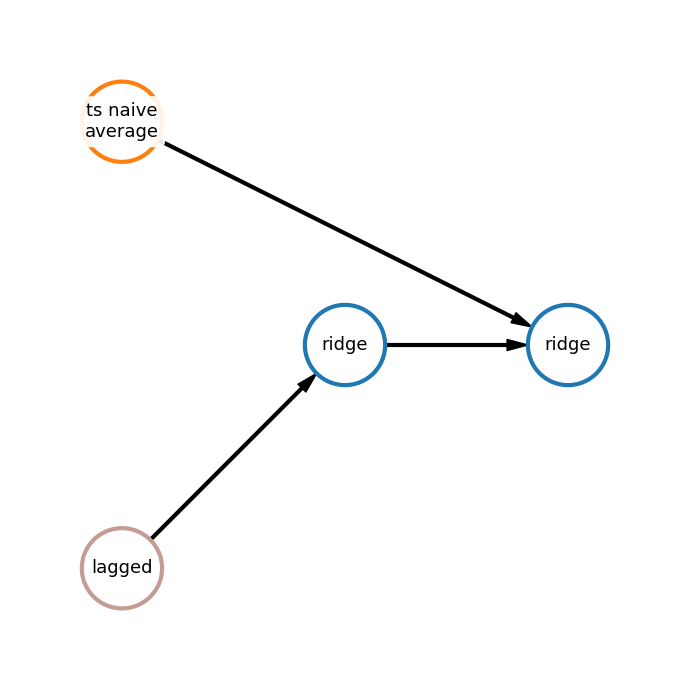

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:50:54,315 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659


2022-12-01 18:50:54,692 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004625 seconds


2022-12-01 18:50:54,719 - build_posterior_wrapper took 0.004625 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:50:54,727 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002351 seconds


2022-12-01 18:50:55,167 - build_posterior_wrapper took 0.002351 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 67.659224


2022-12-01 18:50:55,173 - TPE using 1/1 trials with best loss 67.659224
 20%|██        | 2/10 [00:00<00:06,  1.25trial/s, best loss: 67.65922394796353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002243 seconds


2022-12-01 18:50:55,969 - build_posterior_wrapper took 0.002243 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 67.659224


2022-12-01 18:50:55,985 - TPE using 2/2 trials with best loss 67.659224
 30%|███       | 3/10 [00:03<00:11,  1.65s/trial, best loss: 67.65922394796353]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002337 seconds


2022-12-01 18:50:58,211 - build_posterior_wrapper took 0.002337 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 67.659224


2022-12-01 18:50:58,228 - TPE using 3/3 trials with best loss 67.659224
 40%|████      | 4/10 [00:03<00:06,  1.15s/trial, best loss: 41.77291698255962]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002458 seconds


2022-12-01 18:50:58,763 - build_posterior_wrapper took 0.002458 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 41.772917


2022-12-01 18:50:58,775 - TPE using 4/4 trials with best loss 41.772917
 50%|█████     | 5/10 [00:04<00:05,  1.03s/trial, best loss: 41.77291698255962]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002323 seconds


2022-12-01 18:50:59,623 - build_posterior_wrapper took 0.002323 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 41.772917


2022-12-01 18:50:59,634 - TPE using 5/5 trials with best loss 41.772917
 60%|██████    | 6/10 [00:05<00:04,  1.17s/trial, best loss: 41.77291698255962]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002369 seconds


2022-12-01 18:51:01,039 - build_posterior_wrapper took 0.002369 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 41.772917


2022-12-01 18:51:01,046 - TPE using 6/6 trials with best loss 41.772917
 70%|███████   | 7/10 [00:06<00:02,  1.04trial/s, best loss: 22.13932048737886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004139 seconds


2022-12-01 18:51:01,616 - build_posterior_wrapper took 0.004139 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 22.139320


2022-12-01 18:51:01,636 - TPE using 7/7 trials with best loss 22.139320
 80%|████████  | 8/10 [00:07<00:01,  1.02trial/s, best loss: 22.13932048737886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002260 seconds


2022-12-01 18:51:02,626 - build_posterior_wrapper took 0.002260 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 22.139320


2022-12-01 18:51:02,642 - TPE using 8/8 trials with best loss 22.139320
 90%|█████████ | 9/10 [00:09<00:01,  1.45s/trial, best loss: 22.13932048737886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002290 seconds


2022-12-01 18:51:05,077 - build_posterior_wrapper took 0.002290 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 22.139320


2022-12-01 18:51:05,093 - TPE using 9/9 trials with best loss 22.139320
100%|██████████| 10/10 [00:11<00:00,  1.25s/trial, best loss: 22.13932048737886]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:51:06,885 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 22.139 equal or better than initial (+ 5% deviation) 71.042


2022-12-01 18:51:06,905 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 22.139 equal or better than initial (+ 5% deviation) 71.042


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 1.2391963193481157}
ts_naive_average - {'part_for_averaging': 0.17821274032632123}
ridge - {'alpha': 6.801839046767184}
lagged - {'window_size': 57}


2022-12-01 18:51:06,922 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 1.2391963193481157}
ts_naive_average - {'part_for_averaging': 0.17821274032632123}
ridge - {'alpha': 6.801839046767184}
lagged - {'window_size': 57}


CRITICAL:root:PipelineTuner - Final metric: 22.139


2022-12-01 18:51:06,936 - PipelineTuner - Final metric: 22.139


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:51:07,456 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 1.2391963193481157}
ts_naive_average - {'part_for_averaging': 0.17821274032632123}
ridge - {'alpha': 6.801839046767184}
lagged - {'window_size': 57} 
Initial metric: 15.173


2022-12-01 18:51:07,942 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 1.2391963193481157}
ts_naive_average - {'part_for_averaging': 0.17821274032632123}
ridge - {'alpha': 6.801839046767184}
lagged - {'window_size': 57} 
Initial metric: 15.173
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002527 seconds


2022-12-01 18:51:07,970 - build_posterior_wrapper took 0.002527 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:51:07,987 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003105 seconds


2022-12-01 18:51:08,527 - build_posterior_wrapper took 0.003105 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 15.173314


2022-12-01 18:51:08,535 - TPE using 1/1 trials with best loss 15.173314
 20%|██        | 2/10 [00:02<00:19,  2.41s/trial, best loss: 14.97380491312806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002339 seconds


2022-12-01 18:51:10,943 - build_posterior_wrapper took 0.002339 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 14.973805


2022-12-01 18:51:10,955 - TPE using 2/2 trials with best loss 14.973805
 30%|███       | 3/10 [00:04<00:15,  2.26s/trial, best loss: 14.97380491312806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002322 seconds


2022-12-01 18:51:13,099 - build_posterior_wrapper took 0.002322 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 14.973805


2022-12-01 18:51:13,108 - TPE using 3/3 trials with best loss 14.973805
 40%|████      | 4/10 [00:05<00:09,  1.64s/trial, best loss: 14.97380491312806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002706 seconds


2022-12-01 18:51:14,009 - build_posterior_wrapper took 0.002706 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 14.973805


2022-12-01 18:51:14,019 - TPE using 4/4 trials with best loss 14.973805
 50%|█████     | 5/10 [00:07<00:08,  1.76s/trial, best loss: 14.97380491312806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002525 seconds


2022-12-01 18:51:15,936 - build_posterior_wrapper took 0.002525 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 14.973805


2022-12-01 18:51:15,958 - TPE using 5/5 trials with best loss 14.973805
 60%|██████    | 6/10 [00:09<00:07,  1.96s/trial, best loss: 14.97380491312806]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008809 seconds


2022-12-01 18:51:18,257 - build_posterior_wrapper took 0.008809 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 14.973805


2022-12-01 18:51:18,270 - TPE using 6/6 trials with best loss 14.973805
 70%|███████   | 7/10 [00:10<00:04,  1.53s/trial, best loss: 6.6241716927949055]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002618 seconds


2022-12-01 18:51:18,944 - build_posterior_wrapper took 0.002618 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 6.624172


2022-12-01 18:51:18,955 - TPE using 7/7 trials with best loss 6.624172
 80%|████████  | 8/10 [00:11<00:02,  1.39s/trial, best loss: 6.6241716927949055]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002389 seconds


2022-12-01 18:51:20,044 - build_posterior_wrapper took 0.002389 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 6.624172


2022-12-01 18:51:20,053 - TPE using 8/8 trials with best loss 6.624172
 90%|█████████ | 9/10 [00:12<00:01,  1.25s/trial, best loss: 6.6241716927949055]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002319 seconds


2022-12-01 18:51:20,997 - build_posterior_wrapper took 0.002319 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 6.624172


2022-12-01 18:51:21,019 - TPE using 9/9 trials with best loss 6.624172
100%|██████████| 10/10 [00:12<00:00,  1.44s/trial, best loss: 6.6241716927949055]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:51:22,196 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 6.624 equal or better than initial (+ 5% deviation) 15.932


2022-12-01 18:51:22,206 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 6.624 equal or better than initial (+ 5% deviation) 15.932


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 2.674936741129873}
ts_naive_average - {'part_for_averaging': 0.8986816486627279}
ridge - {'alpha': 7.193316309148254}
lagged - {'window_size': 148}


2022-12-01 18:51:22,220 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 2.674936741129873}
ts_naive_average - {'part_for_averaging': 0.8986816486627279}
ridge - {'alpha': 7.193316309148254}
lagged - {'window_size': 148}


CRITICAL:root:PipelineTuner - Final metric: 6.624


2022-12-01 18:51:22,231 - PipelineTuner - Final metric: 6.624
Fitting pipeline №3


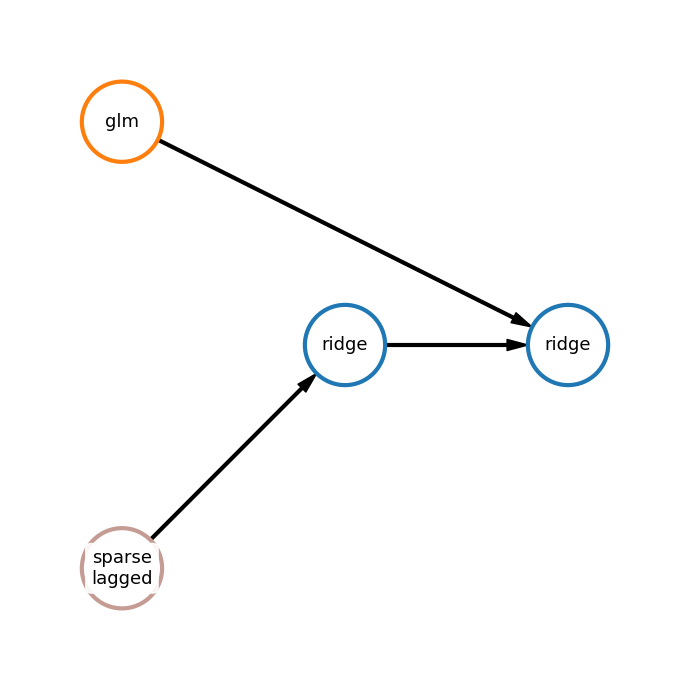

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:51:23,380 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 29.390


2022-12-01 18:51:23,939 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 29.390
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.368554 seconds


2022-12-01 18:51:24,343 - build_posterior_wrapper took 0.368554 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:51:24,350 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010534 seconds


2022-12-01 18:51:24,945 - build_posterior_wrapper took 0.010534 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 180.980804


2022-12-01 18:51:24,958 - TPE using 1/1 trials with best loss 180.980804
 20%|██        | 2/10 [00:06<00:51,  6.47s/trial, best loss: 85.71627733641472]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008405 seconds


2022-12-01 18:51:31,418 - build_posterior_wrapper took 0.008405 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 85.716277


2022-12-01 18:51:31,429 - TPE using 2/2 trials with best loss 85.716277
 30%|███       | 3/10 [00:13<00:48,  6.96s/trial, best loss: 74.03115104142925]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009561 seconds


2022-12-01 18:51:38,717 - build_posterior_wrapper took 0.009561 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 74.031151


2022-12-01 18:51:38,726 - TPE using 3/3 trials with best loss 74.031151
 40%|████      | 4/10 [00:16<00:28,  4.81s/trial, best loss: 74.03115104142925]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005665 seconds


2022-12-01 18:51:40,964 - build_posterior_wrapper took 0.005665 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 74.031151


2022-12-01 18:51:40,969 - TPE using 4/4 trials with best loss 74.031151
 50%|█████     | 5/10 [00:22<00:26,  5.31s/trial, best loss: 64.44251752115423]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005257 seconds


2022-12-01 18:51:47,035 - build_posterior_wrapper took 0.005257 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 64.442518


2022-12-01 18:51:47,044 - TPE using 5/5 trials with best loss 64.442518
 60%|██████    | 6/10 [00:22<00:14,  3.70s/trial, best loss: 22.056407146078808]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006625 seconds


2022-12-01 18:51:47,898 - build_posterior_wrapper took 0.006625 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 22.056407


2022-12-01 18:51:47,909 - TPE using 6/6 trials with best loss 22.056407
 70%|███████   | 7/10 [00:25<00:10,  3.46s/trial, best loss: 22.056407146078808]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005203 seconds


2022-12-01 18:51:50,887 - build_posterior_wrapper took 0.005203 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 22.056407


2022-12-01 18:51:50,893 - TPE using 7/7 trials with best loss 22.056407
 80%|████████  | 8/10 [00:27<00:05,  2.69s/trial, best loss: 12.02250702909384] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006226 seconds


2022-12-01 18:51:51,992 - build_posterior_wrapper took 0.006226 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 12.022507


2022-12-01 18:51:52,007 - TPE using 8/8 trials with best loss 12.022507
 90%|█████████ | 9/10 [00:30<00:02,  2.79s/trial, best loss: 12.02250702909384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005584 seconds


2022-12-01 18:51:54,993 - build_posterior_wrapper took 0.005584 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 12.022507


2022-12-01 18:51:55,006 - TPE using 9/9 trials with best loss 12.022507
100%|██████████| 10/10 [00:35<00:00,  4.00s/trial, best loss: 12.02250702909384]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:52:02,005 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 12.023 equal or better than initial (+ 5% deviation) 30.860


2022-12-01 18:52:02,015 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 12.023 equal or better than initial (+ 5% deviation) 30.860


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.994681872587924}
glm - {'family': 'gamma', 'link': 'log'}
ridge - {'alpha': 8.08538693036128}
sparse_lagged - {'window_size': 114, 'n_components': 0.39840103908184454, 'sparse_transform': True, 'use_svd': True}


2022-12-01 18:52:02,031 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.994681872587924}
glm - {'family': 'gamma', 'link': 'log'}
ridge - {'alpha': 8.08538693036128}
sparse_lagged - {'window_size': 114, 'n_components': 0.39840103908184454, 'sparse_transform': True, 'use_svd': True}


CRITICAL:root:PipelineTuner - Final metric: 12.023


2022-12-01 18:52:02,040 - PipelineTuner - Final metric: 12.023


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:52:02,929 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.994681872587924}
glm - {'family': 'gamma', 'link': 'log'}
ridge - {'alpha': 8.08538693036128}
sparse_lagged - {'window_size': 114, 'n_components': 0.39840103908184454, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 41.678


2022-12-01 18:52:04,124 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.994681872587924}
glm - {'family': 'gamma', 'link': 'log'}
ridge - {'alpha': 8.08538693036128}
sparse_lagged - {'window_size': 114, 'n_components': 0.39840103908184454, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 41.678
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007467 seconds


2022-12-01 18:52:04,173 - build_posterior_wrapper took 0.007467 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:52:04,192 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016778 seconds


2022-12-01 18:52:05,358 - build_posterior_wrapper took 0.016778 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 53.492155


2022-12-01 18:52:05,372 - TPE using 1/1 trials with best loss 53.492155
 20%|██        | 2/10 [00:06<00:49,  6.14s/trial, best loss: 39.507740440439605]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009793 seconds


2022-12-01 18:52:11,497 - build_posterior_wrapper took 0.009793 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 39.507740


2022-12-01 18:52:11,508 - TPE using 2/2 trials with best loss 39.507740
 30%|███       | 3/10 [00:09<00:32,  4.70s/trial, best loss: 23.219791702153053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015350 seconds


2022-12-01 18:52:15,198 - build_posterior_wrapper took 0.015350 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 23.219792


2022-12-01 18:52:15,208 - TPE using 3/3 trials with best loss 23.219792
 40%|████      | 4/10 [00:19<00:40,  6.80s/trial, best loss: 23.219791702153053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008306 seconds


2022-12-01 18:52:24,485 - build_posterior_wrapper took 0.008306 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 23.219792


2022-12-01 18:52:24,493 - TPE using 4/4 trials with best loss 23.219792
 50%|█████     | 5/10 [00:21<00:25,  5.10s/trial, best loss: 16.01148603704476] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011095 seconds


2022-12-01 18:52:26,979 - build_posterior_wrapper took 0.011095 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 16.011486


2022-12-01 18:52:26,986 - TPE using 5/5 trials with best loss 16.011486
 60%|██████    | 6/10 [00:22<00:14,  3.58s/trial, best loss: 16.01148603704476]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006999 seconds


2022-12-01 18:52:27,853 - build_posterior_wrapper took 0.006999 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 16.011486


2022-12-01 18:52:27,860 - TPE using 6/6 trials with best loss 16.011486
 70%|███████   | 7/10 [00:26<00:11,  3.78s/trial, best loss: 16.01148603704476]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005446 seconds


2022-12-01 18:52:32,015 - build_posterior_wrapper took 0.005446 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 16.011486


2022-12-01 18:52:32,025 - TPE using 7/7 trials with best loss 16.011486
 80%|████████  | 8/10 [00:33<00:09,  4.72s/trial, best loss: 15.161670635643175]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009356 seconds


2022-12-01 18:52:38,667 - build_posterior_wrapper took 0.009356 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 15.161671


2022-12-01 18:52:38,677 - TPE using 8/8 trials with best loss 15.161671
 90%|█████████ | 9/10 [00:40<00:05,  5.42s/trial, best loss: 14.145869954542977]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006215 seconds


2022-12-01 18:52:45,602 - build_posterior_wrapper took 0.006215 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 14.145870


2022-12-01 18:52:45,610 - TPE using 9/9 trials with best loss 14.145870
100%|██████████| 10/10 [00:40<00:00,  4.54s/trial, best loss: 14.145869954542977]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:52:52,954 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 14.146 equal or better than initial (+ 5% deviation) 43.761


2022-12-01 18:52:52,961 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 14.146 equal or better than initial (+ 5% deviation) 43.761


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 1.1461320552631231}
glm - {'family': 'gamma', 'link': 'identity'}
ridge - {'alpha': 6.896733943535775}
sparse_lagged - {'window_size': 485, 'n_components': 0.43509404251825, 'sparse_transform': True, 'use_svd': True}


2022-12-01 18:52:52,966 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 1.1461320552631231}
glm - {'family': 'gamma', 'link': 'identity'}
ridge - {'alpha': 6.896733943535775}
sparse_lagged - {'window_size': 485, 'n_components': 0.43509404251825, 'sparse_transform': True, 'use_svd': True}


CRITICAL:root:PipelineTuner - Final metric: 14.146


2022-12-01 18:52:52,970 - PipelineTuner - Final metric: 14.146
Fitting pipeline №4


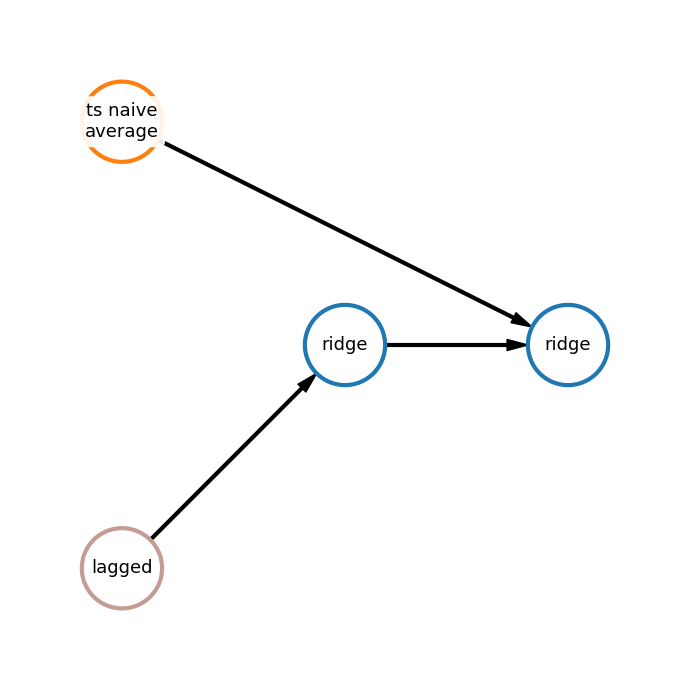

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:52:58,104 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659


2022-12-01 18:52:58,489 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002482 seconds


2022-12-01 18:52:58,521 - build_posterior_wrapper took 0.002482 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:52:58,527 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005348 seconds


2022-12-01 18:52:59,010 - build_posterior_wrapper took 0.005348 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 67.659930


2022-12-01 18:52:59,016 - TPE using 1/1 trials with best loss 67.659930
 20%|██        | 2/10 [00:02<00:18,  2.32s/trial, best loss: 67.65993006380674]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004592 seconds


2022-12-01 18:53:01,338 - build_posterior_wrapper took 0.004592 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 67.659930


2022-12-01 18:53:01,350 - TPE using 2/2 trials with best loss 67.659930
 30%|███       | 3/10 [00:02<00:08,  1.23s/trial, best loss: 67.65993006380674]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002261 seconds


2022-12-01 18:53:01,800 - build_posterior_wrapper took 0.002261 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 67.659930


2022-12-01 18:53:01,813 - TPE using 3/3 trials with best loss 67.659930
 40%|████      | 4/10 [00:05<00:10,  1.76s/trial, best loss: 67.65993006380674]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002245 seconds


2022-12-01 18:53:04,199 - build_posterior_wrapper took 0.002245 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 67.659930


2022-12-01 18:53:04,206 - TPE using 4/4 trials with best loss 67.659930
 50%|█████     | 5/10 [00:06<00:08,  1.64s/trial, best loss: 67.65993006380674]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002687 seconds


2022-12-01 18:53:05,658 - build_posterior_wrapper took 0.002687 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 67.659930


2022-12-01 18:53:05,672 - TPE using 5/5 trials with best loss 67.659930
 60%|██████    | 6/10 [00:07<00:05,  1.28s/trial, best loss: 67.65993006380674]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002528 seconds


2022-12-01 18:53:06,296 - build_posterior_wrapper took 0.002528 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 67.659930


2022-12-01 18:53:06,311 - TPE using 6/6 trials with best loss 67.659930
 70%|███████   | 7/10 [00:09<00:04,  1.60s/trial, best loss: 65.58347963639659]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006025 seconds


2022-12-01 18:53:08,526 - build_posterior_wrapper took 0.006025 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 65.583480


2022-12-01 18:53:08,536 - TPE using 7/7 trials with best loss 65.583480
 80%|████████  | 8/10 [00:10<00:02,  1.27s/trial, best loss: 34.38568865702432]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002220 seconds


2022-12-01 18:53:09,098 - build_posterior_wrapper took 0.002220 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 34.385689


2022-12-01 18:53:09,109 - TPE using 8/8 trials with best loss 34.385689
 90%|█████████ | 9/10 [00:12<00:01,  1.64s/trial, best loss: 34.38568865702432]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010212 seconds


2022-12-01 18:53:11,538 - build_posterior_wrapper took 0.010212 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 34.385689


2022-12-01 18:53:11,551 - TPE using 9/9 trials with best loss 34.385689
100%|██████████| 10/10 [00:14<00:00,  1.58s/trial, best loss: 34.38568865702432]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:53:13,783 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 34.386 equal or better than initial (+ 5% deviation) 71.042


2022-12-01 18:53:13,811 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 34.386 equal or better than initial (+ 5% deviation) 71.042


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.6480658215755404}
ts_naive_average - {'part_for_averaging': 0.7063193575824055}
ridge - {'alpha': 8.844416513068948}
lagged - {'window_size': 44}


2022-12-01 18:53:13,824 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.6480658215755404}
ts_naive_average - {'part_for_averaging': 0.7063193575824055}
ridge - {'alpha': 8.844416513068948}
lagged - {'window_size': 44}


CRITICAL:root:PipelineTuner - Final metric: 34.386


2022-12-01 18:53:13,838 - PipelineTuner - Final metric: 34.386


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:53:14,373 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.6480658215755404}
ts_naive_average - {'part_for_averaging': 0.7063193575824055}
ridge - {'alpha': 8.844416513068948}
lagged - {'window_size': 44} 
Initial metric: 8.777


2022-12-01 18:53:14,920 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.6480658215755404}
ts_naive_average - {'part_for_averaging': 0.7063193575824055}
ridge - {'alpha': 8.844416513068948}
lagged - {'window_size': 44} 
Initial metric: 8.777
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006883 seconds


2022-12-01 18:53:14,968 - build_posterior_wrapper took 0.006883 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:53:14,975 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003696 seconds


2022-12-01 18:53:15,490 - build_posterior_wrapper took 0.003696 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 8.776775


2022-12-01 18:53:15,510 - TPE using 1/1 trials with best loss 8.776775
 20%|██        | 2/10 [00:00<00:05,  1.56trial/s, best loss: 8.776775396813912]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003628 seconds


2022-12-01 18:53:16,140 - build_posterior_wrapper took 0.003628 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 8.776775


2022-12-01 18:53:16,158 - TPE using 2/2 trials with best loss 8.776775
 30%|███       | 3/10 [00:01<00:03,  1.81trial/s, best loss: 8.776775396813912]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002292 seconds


2022-12-01 18:53:16,621 - build_posterior_wrapper took 0.002292 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 8.776775


2022-12-01 18:53:16,637 - TPE using 3/3 trials with best loss 8.776775
 40%|████      | 4/10 [00:03<00:08,  1.39s/trial, best loss: 8.776775396813912]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002294 seconds


2022-12-01 18:53:19,015 - build_posterior_wrapper took 0.002294 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 8.776775


2022-12-01 18:53:19,029 - TPE using 4/4 trials with best loss 8.776775
 50%|█████     | 5/10 [00:04<00:05,  1.06s/trial, best loss: 8.776775396813912]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002319 seconds


2022-12-01 18:53:19,571 - build_posterior_wrapper took 0.002319 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 8.776775


2022-12-01 18:53:19,587 - TPE using 5/5 trials with best loss 8.776775
 60%|██████    | 6/10 [00:04<00:03,  1.11trial/s, best loss: 6.085574700485256]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002468 seconds


2022-12-01 18:53:20,197 - build_posterior_wrapper took 0.002468 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 6.085575


2022-12-01 18:53:20,209 - TPE using 6/6 trials with best loss 6.085575
 70%|███████   | 7/10 [00:05<00:02,  1.29trial/s, best loss: 6.085574700485256]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014260 seconds


2022-12-01 18:53:20,744 - build_posterior_wrapper took 0.014260 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 6.085575


2022-12-01 18:53:20,751 - TPE using 7/7 trials with best loss 6.085575
 80%|████████  | 8/10 [00:06<00:01,  1.26trial/s, best loss: 6.085574700485256]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002325 seconds


2022-12-01 18:53:21,554 - build_posterior_wrapper took 0.002325 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 6.085575


2022-12-01 18:53:21,566 - TPE using 8/8 trials with best loss 6.085575
 90%|█████████ | 9/10 [00:07<00:01,  1.07s/trial, best loss: 6.085574700485256]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002697 seconds


2022-12-01 18:53:23,225 - build_posterior_wrapper took 0.002697 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 6.085575


2022-12-01 18:53:23,231 - TPE using 9/9 trials with best loss 6.085575
100%|██████████| 10/10 [00:08<00:00,  1.10trial/s, best loss: 6.085574700485256]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:53:24,231 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 6.086 equal or better than initial (+ 5% deviation) 9.216


2022-12-01 18:53:24,255 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 6.086 equal or better than initial (+ 5% deviation) 9.216


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 4.721812709429797}
ts_naive_average - {'part_for_averaging': 0.7944318546911135}
ridge - {'alpha': 9.818916992056597}
lagged - {'window_size': 97}


2022-12-01 18:53:24,272 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 4.721812709429797}
ts_naive_average - {'part_for_averaging': 0.7944318546911135}
ridge - {'alpha': 9.818916992056597}
lagged - {'window_size': 97}


CRITICAL:root:PipelineTuner - Final metric: 6.086


2022-12-01 18:53:24,279 - PipelineTuner - Final metric: 6.086
Fitting pipeline №5


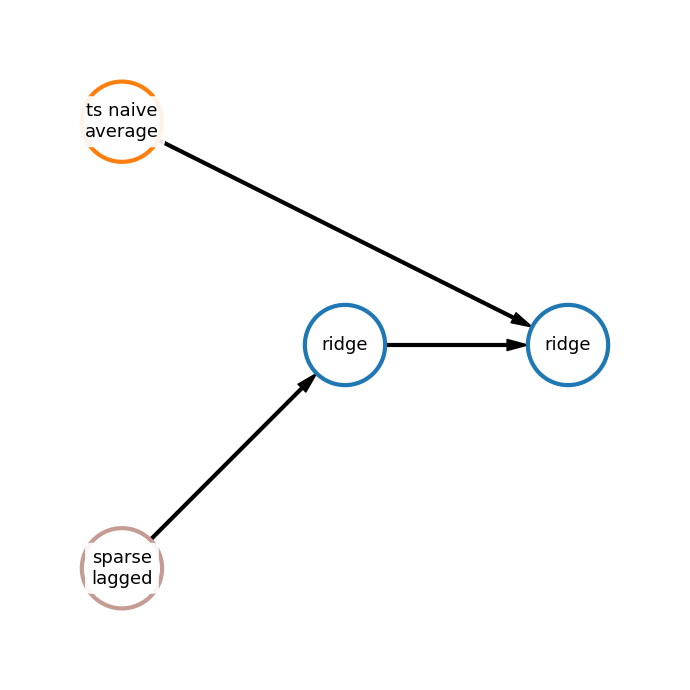

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:53:25,341 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 64.871


2022-12-01 18:53:25,684 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 64.871
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003723 seconds


2022-12-01 18:53:25,702 - build_posterior_wrapper took 0.003723 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:53:25,708 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006076 seconds


2022-12-01 18:53:26,148 - build_posterior_wrapper took 0.006076 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 64.871054


2022-12-01 18:53:26,156 - TPE using 1/1 trials with best loss 64.871054
 20%|██        | 2/10 [00:00<00:04,  1.98trial/s, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003149 seconds


2022-12-01 18:53:26,652 - build_posterior_wrapper took 0.003149 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 64.871054


2022-12-01 18:53:26,664 - TPE using 2/2 trials with best loss 64.871054
 30%|███       | 3/10 [00:01<00:06,  1.13trial/s, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003415 seconds


2022-12-01 18:53:27,798 - build_posterior_wrapper took 0.003415 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 64.871054


2022-12-01 18:53:27,809 - TPE using 3/3 trials with best loss 64.871054
 40%|████      | 4/10 [00:03<00:06,  1.16s/trial, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003194 seconds


2022-12-01 18:53:29,288 - build_posterior_wrapper took 0.003194 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 64.871054


2022-12-01 18:53:29,305 - TPE using 4/4 trials with best loss 64.871054
 50%|█████     | 5/10 [00:05<00:08,  1.79s/trial, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003608 seconds


2022-12-01 18:53:32,047 - build_posterior_wrapper took 0.003608 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 64.871054


2022-12-01 18:53:32,054 - TPE using 5/5 trials with best loss 64.871054
 60%|██████    | 6/10 [00:08<00:07,  1.98s/trial, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003422 seconds


2022-12-01 18:53:34,352 - build_posterior_wrapper took 0.003422 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 64.871054


2022-12-01 18:53:34,365 - TPE using 6/6 trials with best loss 64.871054
 70%|███████   | 7/10 [00:14<00:10,  3.36s/trial, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003354 seconds


2022-12-01 18:53:40,393 - build_posterior_wrapper took 0.003354 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 64.871054


2022-12-01 18:53:40,410 - TPE using 7/7 trials with best loss 64.871054
 80%|████████  | 8/10 [00:17<00:06,  3.35s/trial, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003554 seconds


2022-12-01 18:53:43,726 - build_posterior_wrapper took 0.003554 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 64.871054


2022-12-01 18:53:43,739 - TPE using 8/8 trials with best loss 64.871054
 90%|█████████ | 9/10 [00:18<00:02,  2.63s/trial, best loss: 64.87105359553703]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003250 seconds


2022-12-01 18:53:44,823 - build_posterior_wrapper took 0.003250 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 64.871054


2022-12-01 18:53:44,838 - TPE using 9/9 trials with best loss 64.871054
100%|██████████| 10/10 [00:23<00:00,  2.58s/trial, best loss: 64.87105359553703]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:53:49,759 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 64.871 equal or better than initial (+ 5% deviation) 68.115


2022-12-01 18:53:49,778 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 64.871 equal or better than initial (+ 5% deviation) 68.115


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {'alpha': 1.5084891884386382}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {'alpha': 0.5255957317707542}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}


2022-12-01 18:53:49,793 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {'alpha': 1.5084891884386382}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {'alpha': 0.5255957317707542}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}


CRITICAL:root:PipelineTuner - Final metric: 64.871


2022-12-01 18:53:49,802 - PipelineTuner - Final metric: 64.871


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:53:50,252 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {'alpha': 1.5084891884386382}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {'alpha': 0.5255957317707542}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 17.850


2022-12-01 18:53:50,733 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {'alpha': 1.5084891884386382}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {'alpha': 0.5255957317707542}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 17.850
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003406 seconds


2022-12-01 18:53:50,763 - build_posterior_wrapper took 0.003406 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:53:50,773 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004753 seconds


2022-12-01 18:53:51,262 - build_posterior_wrapper took 0.004753 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 17.849781


2022-12-01 18:53:51,272 - TPE using 1/1 trials with best loss 17.849781
 20%|██        | 2/10 [00:00<00:05,  1.59trial/s, best loss: 17.84978105509761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003578 seconds


2022-12-01 18:53:51,896 - build_posterior_wrapper took 0.003578 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 17.849781


2022-12-01 18:53:51,910 - TPE using 2/2 trials with best loss 17.849781
 30%|███       | 3/10 [00:04<00:16,  2.38s/trial, best loss: 17.84978105509761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003243 seconds


2022-12-01 18:53:55,500 - build_posterior_wrapper took 0.003243 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 17.849781


2022-12-01 18:53:55,515 - TPE using 3/3 trials with best loss 17.849781
 40%|████      | 4/10 [00:08<00:19,  3.29s/trial, best loss: 17.84978105509761]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003508 seconds


2022-12-01 18:53:59,868 - build_posterior_wrapper took 0.003508 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 17.849781


2022-12-01 18:53:59,874 - TPE using 4/4 trials with best loss 17.849781
 50%|█████     | 5/10 [00:10<00:13,  2.63s/trial, best loss: 9.770496577528723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003563 seconds


2022-12-01 18:54:01,476 - build_posterior_wrapper took 0.003563 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 9.770497


2022-12-01 18:54:01,483 - TPE using 5/5 trials with best loss 9.770497
 60%|██████    | 6/10 [00:12<00:09,  2.44s/trial, best loss: 9.770496577528723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003307 seconds


2022-12-01 18:54:03,582 - build_posterior_wrapper took 0.003307 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 9.770497


2022-12-01 18:54:03,601 - TPE using 6/6 trials with best loss 9.770497
 70%|███████   | 7/10 [00:15<00:08,  2.81s/trial, best loss: 9.770496577528723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003359 seconds


2022-12-01 18:54:07,116 - build_posterior_wrapper took 0.003359 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 9.770497


2022-12-01 18:54:07,123 - TPE using 7/7 trials with best loss 9.770497
 80%|████████  | 8/10 [00:16<00:04,  2.03s/trial, best loss: 9.770496577528723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004392 seconds


2022-12-01 18:54:07,536 - build_posterior_wrapper took 0.004392 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 9.770497


2022-12-01 18:54:07,546 - TPE using 8/8 trials with best loss 9.770497
 90%|█████████ | 9/10 [00:17<00:01,  1.69s/trial, best loss: 7.3481330247097985]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003253 seconds


2022-12-01 18:54:08,497 - build_posterior_wrapper took 0.003253 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 7.348133


2022-12-01 18:54:08,517 - TPE using 9/9 trials with best loss 7.348133
100%|██████████| 10/10 [00:21<00:00,  2.37s/trial, best loss: 7.3481330247097985]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:54:13,511 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 7.348 equal or better than initial (+ 5% deviation) 18.742


2022-12-01 18:54:13,516 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 7.348 equal or better than initial (+ 5% deviation) 18.742


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {'alpha': 2.1679200846760143}
ts_naive_average - {'part_for_averaging': 0.16931237437629842}
ridge - {'alpha': 9.502855390187179}
sparse_lagged - {'window_size': 112, 'n_components': 0.27876346216771253, 'sparse_transform': True, 'use_svd': True}


2022-12-01 18:54:13,534 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, sparse_lagged]}
ridge - {'alpha': 2.1679200846760143}
ts_naive_average - {'part_for_averaging': 0.16931237437629842}
ridge - {'alpha': 9.502855390187179}
sparse_lagged - {'window_size': 112, 'n_components': 0.27876346216771253, 'sparse_transform': True, 'use_svd': True}


CRITICAL:root:PipelineTuner - Final metric: 7.348


2022-12-01 18:54:13,544 - PipelineTuner - Final metric: 7.348
Fitting pipeline №6


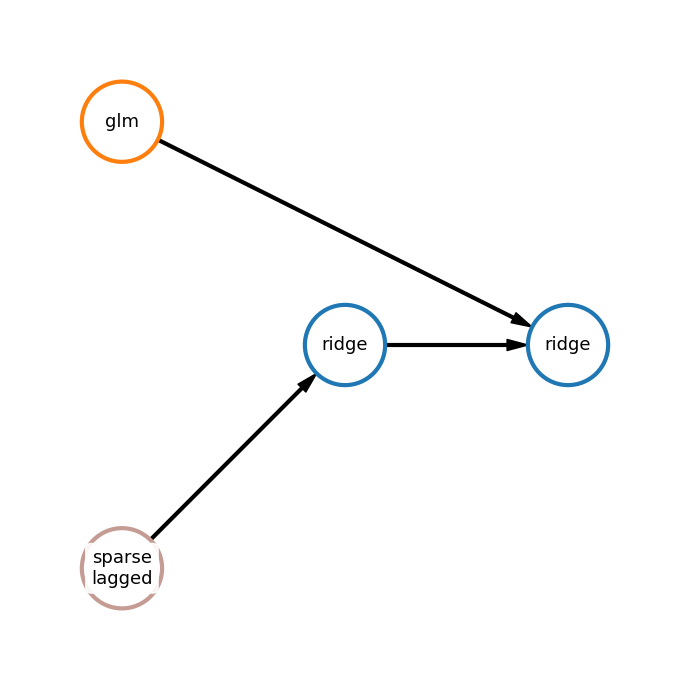

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:54:15,107 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 29.390


2022-12-01 18:54:15,625 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 29.390
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009860 seconds


2022-12-01 18:54:15,669 - build_posterior_wrapper took 0.009860 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:54:15,677 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008253 seconds


2022-12-01 18:54:16,337 - build_posterior_wrapper took 0.008253 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 29.390015


2022-12-01 18:54:16,343 - TPE using 1/1 trials with best loss 29.390015
 20%|██        | 2/10 [00:00<00:06,  1.18trial/s, best loss: 29.39001491409695]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009518 seconds


2022-12-01 18:54:17,185 - build_posterior_wrapper took 0.009518 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 29.390015


2022-12-01 18:54:17,192 - TPE using 2/2 trials with best loss 29.390015
 30%|███       | 3/10 [00:01<00:05,  1.28trial/s, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005425 seconds


2022-12-01 18:54:17,911 - build_posterior_wrapper took 0.005425 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 16.183531


2022-12-01 18:54:17,924 - TPE using 3/3 trials with best loss 16.183531
 40%|████      | 4/10 [00:03<00:07,  1.18s/trial, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010751 seconds


2022-12-01 18:54:19,574 - build_posterior_wrapper took 0.010751 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 16.183531


2022-12-01 18:54:19,591 - TPE using 4/4 trials with best loss 16.183531
 50%|█████     | 5/10 [00:04<00:05,  1.03s/trial, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005835 seconds


2022-12-01 18:54:20,359 - build_posterior_wrapper took 0.005835 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 16.183531


2022-12-01 18:54:20,372 - TPE using 5/5 trials with best loss 16.183531
 60%|██████    | 6/10 [00:07<00:07,  1.81s/trial, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006261 seconds


2022-12-01 18:54:23,567 - build_posterior_wrapper took 0.006261 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 16.183531


2022-12-01 18:54:23,580 - TPE using 6/6 trials with best loss 16.183531
 70%|███████   | 7/10 [00:08<00:05,  1.69s/trial, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005508 seconds


2022-12-01 18:54:25,015 - build_posterior_wrapper took 0.005508 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 16.183531


2022-12-01 18:54:25,036 - TPE using 7/7 trials with best loss 16.183531
 80%|████████  | 8/10 [00:10<00:03,  1.72s/trial, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012700 seconds


2022-12-01 18:54:26,814 - build_posterior_wrapper took 0.012700 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 16.183531


2022-12-01 18:54:26,823 - TPE using 8/8 trials with best loss 16.183531
 90%|█████████ | 9/10 [00:17<00:03,  3.34s/trial, best loss: 16.18353101114316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005584 seconds


2022-12-01 18:54:33,601 - build_posterior_wrapper took 0.005584 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 16.183531


2022-12-01 18:54:33,613 - TPE using 9/9 trials with best loss 16.183531
100%|██████████| 10/10 [00:17<00:00,  1.98s/trial, best loss: 16.18353101114316]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:54:34,927 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 16.184 equal or better than initial (+ 5% deviation) 30.860


2022-12-01 18:54:34,938 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 16.184 equal or better than initial (+ 5% deviation) 30.860


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.909562961580766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 9.538146183613666}
sparse_lagged - {'window_size': 41, 'n_components': 0.12722701012987614, 'sparse_transform': True, 'use_svd': False}


2022-12-01 18:54:34,953 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.909562961580766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 9.538146183613666}
sparse_lagged - {'window_size': 41, 'n_components': 0.12722701012987614, 'sparse_transform': True, 'use_svd': False}


CRITICAL:root:PipelineTuner - Final metric: 16.184


2022-12-01 18:54:34,967 - PipelineTuner - Final metric: 16.184


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:54:35,595 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.909562961580766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 9.538146183613666}
sparse_lagged - {'window_size': 41, 'n_components': 0.12722701012987614, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 23.036


2022-12-01 18:54:36,320 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 9.909562961580766}
glm - {'family': 'gaussian', 'link': 'log'}
ridge - {'alpha': 9.538146183613666}
sparse_lagged - {'window_size': 41, 'n_components': 0.12722701012987614, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 23.036
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015075 seconds


2022-12-01 18:54:36,367 - build_posterior_wrapper took 0.015075 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:54:36,380 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005474 seconds


2022-12-01 18:54:37,103 - build_posterior_wrapper took 0.005474 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 59.510107


2022-12-01 18:54:37,117 - TPE using 1/1 trials with best loss 59.510107
 20%|██        | 2/10 [00:02<00:18,  2.28s/trial, best loss: 25.24625042702298]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006871 seconds


2022-12-01 18:54:39,384 - build_posterior_wrapper took 0.006871 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 25.246250


2022-12-01 18:54:39,392 - TPE using 2/2 trials with best loss 25.246250
 30%|███       | 3/10 [00:04<00:13,  1.96s/trial, best loss: 25.24625042702298]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008196 seconds


2022-12-01 18:54:41,120 - build_posterior_wrapper took 0.008196 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 25.246250


2022-12-01 18:54:41,127 - TPE using 3/3 trials with best loss 25.246250
 40%|████      | 4/10 [00:04<00:09,  1.50s/trial, best loss: 25.24625042702298]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005295 seconds


2022-12-01 18:54:42,082 - build_posterior_wrapper took 0.005295 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 25.246250


2022-12-01 18:54:42,088 - TPE using 4/4 trials with best loss 25.246250
 50%|█████     | 5/10 [00:07<00:09,  1.97s/trial, best loss: 25.24625042702298]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005233 seconds


2022-12-01 18:54:44,759 - build_posterior_wrapper took 0.005233 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 25.246250


2022-12-01 18:54:44,765 - TPE using 5/5 trials with best loss 25.246250
 60%|██████    | 6/10 [00:10<00:08,  2.12s/trial, best loss: 25.24625042702298]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005329 seconds


2022-12-01 18:54:47,152 - build_posterior_wrapper took 0.005329 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 25.246250


2022-12-01 18:54:47,158 - TPE using 6/6 trials with best loss 25.246250
 70%|███████   | 7/10 [00:16<00:10,  3.44s/trial, best loss: 25.24625042702298]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009181 seconds


2022-12-01 18:54:53,153 - build_posterior_wrapper took 0.009181 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 25.246250


2022-12-01 18:54:53,163 - TPE using 7/7 trials with best loss 25.246250
 80%|████████  | 8/10 [00:23<00:09,  4.62s/trial, best loss: 14.229384207360072]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016116 seconds


2022-12-01 18:55:00,203 - build_posterior_wrapper took 0.016116 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 14.229384


2022-12-01 18:55:00,211 - TPE using 8/8 trials with best loss 14.229384
 90%|█████████ | 9/10 [00:24<00:03,  3.45s/trial, best loss: 14.229384207360072]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007148 seconds


2022-12-01 18:55:01,158 - build_posterior_wrapper took 0.007148 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 14.229384


2022-12-01 18:55:01,164 - TPE using 9/9 trials with best loss 14.229384
100%|██████████| 10/10 [00:24<00:00,  2.77s/trial, best loss: 14.229384207360072]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:55:09,531 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 14.229 equal or better than initial (+ 5% deviation) 24.187


2022-12-01 18:55:09,539 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 14.229 equal or better than initial (+ 5% deviation) 24.187


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 5.256466211053583}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 3.04497164936585}
sparse_lagged - {'window_size': 484, 'n_components': 0.4113733647513746, 'sparse_transform': True, 'use_svd': False}


2022-12-01 18:55:09,547 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 5.256466211053583}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 3.04497164936585}
sparse_lagged - {'window_size': 484, 'n_components': 0.4113733647513746, 'sparse_transform': True, 'use_svd': False}


CRITICAL:root:PipelineTuner - Final metric: 14.229


2022-12-01 18:55:09,558 - PipelineTuner - Final metric: 14.229
Fitting pipeline №7


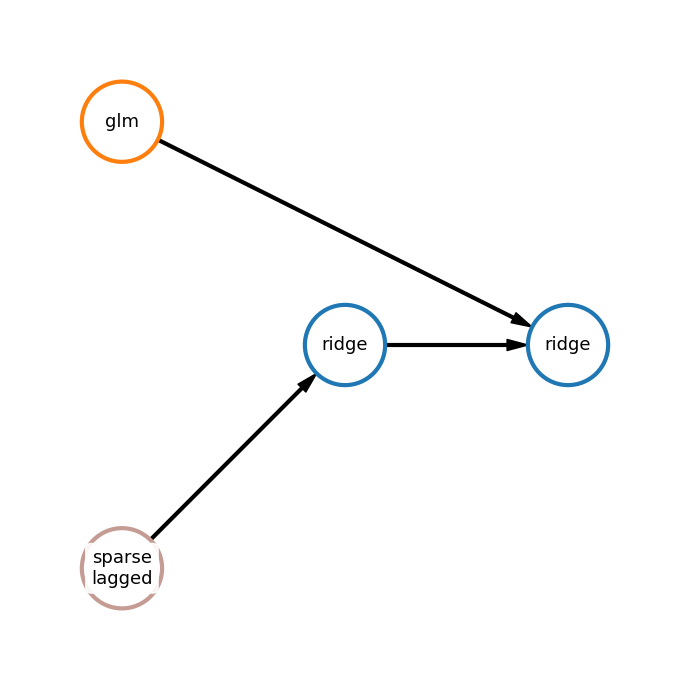

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:55:14,938 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 29.390


2022-12-01 18:55:15,488 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 29.390
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010291 seconds


2022-12-01 18:55:15,532 - build_posterior_wrapper took 0.010291 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:55:15,548 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005540 seconds


2022-12-01 18:55:16,216 - build_posterior_wrapper took 0.005540 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 21.529946


2022-12-01 18:55:16,226 - TPE using 1/1 trials with best loss 21.529946
 20%|██        | 2/10 [00:06<00:53,  6.70s/trial, best loss: 21.529945745094906]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006410 seconds


2022-12-01 18:55:22,926 - build_posterior_wrapper took 0.006410 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 21.529946


2022-12-01 18:55:22,939 - TPE using 2/2 trials with best loss 21.529946
 30%|███       | 3/10 [00:08<00:25,  3.59s/trial, best loss: 21.529945745094906]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005308 seconds


2022-12-01 18:55:24,331 - build_posterior_wrapper took 0.005308 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 21.529946


2022-12-01 18:55:24,337 - TPE using 3/3 trials with best loss 21.529946
 40%|████      | 4/10 [00:10<00:16,  2.83s/trial, best loss: 21.529945745094906]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005703 seconds


2022-12-01 18:55:26,259 - build_posterior_wrapper took 0.005703 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 21.529946


2022-12-01 18:55:26,266 - TPE using 4/4 trials with best loss 21.529946
 50%|█████     | 5/10 [00:10<00:10,  2.08s/trial, best loss: 21.529945745094906]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006331 seconds


2022-12-01 18:55:27,192 - build_posterior_wrapper took 0.006331 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 21.529946


2022-12-01 18:55:27,199 - TPE using 5/5 trials with best loss 21.529946
 60%|██████    | 6/10 [00:12<00:07,  1.75s/trial, best loss: 13.382929725695613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006344 seconds


2022-12-01 18:55:28,363 - build_posterior_wrapper took 0.006344 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 13.382930


2022-12-01 18:55:28,376 - TPE using 6/6 trials with best loss 13.382930
 70%|███████   | 7/10 [00:16<00:07,  2.56s/trial, best loss: 13.382929725695613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008528 seconds


2022-12-01 18:55:32,492 - build_posterior_wrapper took 0.008528 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 13.382930


2022-12-01 18:55:32,504 - TPE using 7/7 trials with best loss 13.382930
 80%|████████  | 8/10 [00:19<00:05,  2.85s/trial, best loss: 13.382929725695613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005659 seconds


2022-12-01 18:55:35,938 - build_posterior_wrapper took 0.005659 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 13.382930


2022-12-01 18:55:35,958 - TPE using 8/8 trials with best loss 13.382930
 90%|█████████ | 9/10 [00:20<00:02,  2.23s/trial, best loss: 13.382929725695613]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005426 seconds


2022-12-01 18:55:36,829 - build_posterior_wrapper took 0.005426 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 13.382930


2022-12-01 18:55:36,842 - TPE using 9/9 trials with best loss 13.382930
100%|██████████| 10/10 [00:23<00:00,  2.66s/trial, best loss: 13.382929725695613]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:55:41,370 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 13.383 equal or better than initial (+ 5% deviation) 30.860


2022-12-01 18:55:41,382 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 13.383 equal or better than initial (+ 5% deviation) 30.860


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 3.9503755706491694}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 0.5110177644406144}
sparse_lagged - {'window_size': 126, 'n_components': 0.28735442164356706, 'sparse_transform': True, 'use_svd': True}


2022-12-01 18:55:41,395 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 3.9503755706491694}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 0.5110177644406144}
sparse_lagged - {'window_size': 126, 'n_components': 0.28735442164356706, 'sparse_transform': True, 'use_svd': True}


CRITICAL:root:PipelineTuner - Final metric: 13.383


2022-12-01 18:55:41,399 - PipelineTuner - Final metric: 13.383


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:55:42,720 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 3.9503755706491694}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 0.5110177644406144}
sparse_lagged - {'window_size': 126, 'n_components': 0.28735442164356706, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 37.641


2022-12-01 18:55:43,880 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 3.9503755706491694}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 0.5110177644406144}
sparse_lagged - {'window_size': 126, 'n_components': 0.28735442164356706, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 37.641
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005751 seconds


2022-12-01 18:55:43,908 - build_posterior_wrapper took 0.005751 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:55:43,913 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008373 seconds


2022-12-01 18:55:45,123 - build_posterior_wrapper took 0.008373 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 37.640758


2022-12-01 18:55:45,134 - TPE using 1/1 trials with best loss 37.640758
 20%|██        | 2/10 [00:01<00:15,  1.99s/trial, best loss: 17.592243978325577]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005800 seconds


2022-12-01 18:55:47,113 - build_posterior_wrapper took 0.005800 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 17.592244


2022-12-01 18:55:47,131 - TPE using 2/2 trials with best loss 17.592244
 30%|███       | 3/10 [00:08<00:31,  4.44s/trial, best loss: 17.592243978325577]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005373 seconds


2022-12-01 18:55:53,270 - build_posterior_wrapper took 0.005373 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 17.592244


2022-12-01 18:55:53,287 - TPE using 3/3 trials with best loss 17.592244
 40%|████      | 4/10 [00:09<00:17,  2.90s/trial, best loss: 17.592243978325577]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011797 seconds


2022-12-01 18:55:54,351 - build_posterior_wrapper took 0.011797 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 17.592244


2022-12-01 18:55:54,366 - TPE using 4/4 trials with best loss 17.592244
 50%|█████     | 5/10 [00:10<00:11,  2.37s/trial, best loss: 17.592243978325577]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005363 seconds


2022-12-01 18:55:55,886 - build_posterior_wrapper took 0.005363 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 17.592244


2022-12-01 18:55:55,892 - TPE using 5/5 trials with best loss 17.592244
 60%|██████    | 6/10 [00:11<00:07,  1.81s/trial, best loss: 14.790312295013694]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005280 seconds


2022-12-01 18:55:56,717 - build_posterior_wrapper took 0.005280 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 14.790312


2022-12-01 18:55:56,723 - TPE using 6/6 trials with best loss 14.790312
 70%|███████   | 7/10 [00:17<00:09,  3.09s/trial, best loss: 14.790312295013694]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005708 seconds


2022-12-01 18:56:02,302 - build_posterior_wrapper took 0.005708 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 14.790312


2022-12-01 18:56:02,309 - TPE using 7/7 trials with best loss 14.790312
 80%|████████  | 8/10 [00:18<00:05,  2.64s/trial, best loss: 14.790312295013694]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005448 seconds


2022-12-01 18:56:04,014 - build_posterior_wrapper took 0.005448 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 14.790312


2022-12-01 18:56:04,026 - TPE using 8/8 trials with best loss 14.790312
 90%|█████████ | 9/10 [00:25<00:03,  3.87s/trial, best loss: 14.790312295013694]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005991 seconds


2022-12-01 18:56:10,501 - build_posterior_wrapper took 0.005991 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 14.790312


2022-12-01 18:56:10,517 - TPE using 9/9 trials with best loss 14.790312
100%|██████████| 10/10 [00:29<00:00,  3.26s/trial, best loss: 14.790312295013694]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:56:15,202 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 14.790 equal or better than initial (+ 5% deviation) 39.523


2022-12-01 18:56:15,206 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 14.790 equal or better than initial (+ 5% deviation) 39.523


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 3.7274076666773293}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 6.928127670351181}
sparse_lagged - {'window_size': 48, 'n_components': 0.3281239840488764, 'sparse_transform': True, 'use_svd': True}


2022-12-01 18:56:15,222 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, sparse_lagged]}
ridge - {'alpha': 3.7274076666773293}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
ridge - {'alpha': 6.928127670351181}
sparse_lagged - {'window_size': 48, 'n_components': 0.3281239840488764, 'sparse_transform': True, 'use_svd': True}


CRITICAL:root:PipelineTuner - Final metric: 14.790


2022-12-01 18:56:15,235 - PipelineTuner - Final metric: 14.790
Fitting pipeline №8


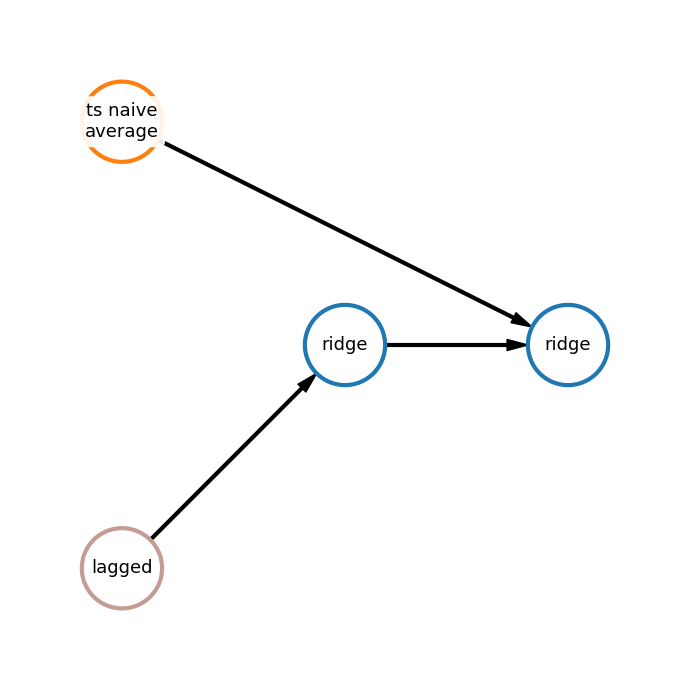

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:56:16,465 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659


2022-12-01 18:56:16,853 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 67.659
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002388 seconds


2022-12-01 18:56:16,876 - build_posterior_wrapper took 0.002388 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:56:16,896 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002970 seconds


2022-12-01 18:56:17,393 - build_posterior_wrapper took 0.002970 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 67.659196


2022-12-01 18:56:17,404 - TPE using 1/1 trials with best loss 67.659196
 20%|██        | 2/10 [00:00<00:07,  1.02trial/s, best loss: 67.65919603680396]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002800 seconds


2022-12-01 18:56:18,383 - build_posterior_wrapper took 0.002800 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 67.659196


2022-12-01 18:56:18,394 - TPE using 2/2 trials with best loss 67.659196
 30%|███       | 3/10 [00:01<00:05,  1.21trial/s, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002299 seconds


2022-12-01 18:56:19,097 - build_posterior_wrapper took 0.002299 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 61.562201


2022-12-01 18:56:19,112 - TPE using 3/3 trials with best loss 61.562201
 40%|████      | 4/10 [00:03<00:06,  1.14s/trial, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002351 seconds


2022-12-01 18:56:20,604 - build_posterior_wrapper took 0.002351 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 61.562201


2022-12-01 18:56:20,625 - TPE using 4/4 trials with best loss 61.562201
 50%|█████     | 5/10 [00:05<00:07,  1.58s/trial, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011996 seconds


2022-12-01 18:56:22,882 - build_posterior_wrapper took 0.011996 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 61.562201


2022-12-01 18:56:22,892 - TPE using 5/5 trials with best loss 61.562201
 60%|██████    | 6/10 [00:06<00:04,  1.24s/trial, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002276 seconds


2022-12-01 18:56:23,491 - build_posterior_wrapper took 0.002276 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 61.562201


2022-12-01 18:56:23,501 - TPE using 6/6 trials with best loss 61.562201
 70%|███████   | 7/10 [00:08<00:05,  1.70s/trial, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002322 seconds


2022-12-01 18:56:26,083 - build_posterior_wrapper took 0.002322 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 61.562201


2022-12-01 18:56:26,094 - TPE using 7/7 trials with best loss 61.562201
 80%|████████  | 8/10 [00:09<00:02,  1.41s/trial, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002389 seconds


2022-12-01 18:56:26,904 - build_posterior_wrapper took 0.002389 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 61.562201


2022-12-01 18:56:26,920 - TPE using 8/8 trials with best loss 61.562201
 90%|█████████ | 9/10 [00:10<00:01,  1.29s/trial, best loss: 61.56220127387919]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005889 seconds


2022-12-01 18:56:27,929 - build_posterior_wrapper took 0.005889 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 61.562201


2022-12-01 18:56:27,940 - TPE using 9/9 trials with best loss 61.562201
100%|██████████| 10/10 [00:11<00:00,  1.23s/trial, best loss: 48.78511726021628]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:56:28,904 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 48.785 equal or better than initial (+ 5% deviation) 71.042


2022-12-01 18:56:28,924 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 48.785 equal or better than initial (+ 5% deviation) 71.042


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.25860430521629313}
ts_naive_average - {'part_for_averaging': 0.945035376254584}
ridge - {'alpha': 0.6780904500153164}
lagged - {'window_size': 29}


2022-12-01 18:56:28,933 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.25860430521629313}
ts_naive_average - {'part_for_averaging': 0.945035376254584}
ridge - {'alpha': 0.6780904500153164}
lagged - {'window_size': 29}


CRITICAL:root:PipelineTuner - Final metric: 48.785


2022-12-01 18:56:28,943 - PipelineTuner - Final metric: 48.785


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 18:56:29,468 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.25860430521629313}
ts_naive_average - {'part_for_averaging': 0.945035376254584}
ridge - {'alpha': 0.6780904500153164}
lagged - {'window_size': 29} 
Initial metric: 12.766


2022-12-01 18:56:29,998 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.25860430521629313}
ts_naive_average - {'part_for_averaging': 0.945035376254584}
ridge - {'alpha': 0.6780904500153164}
lagged - {'window_size': 29} 
Initial metric: 12.766
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003953 seconds


2022-12-01 18:56:30,030 - build_posterior_wrapper took 0.003953 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 18:56:30,039 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002517 seconds


2022-12-01 18:56:30,568 - build_posterior_wrapper took 0.002517 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 12.765872


2022-12-01 18:56:30,584 - TPE using 1/1 trials with best loss 12.765872
 20%|██        | 2/10 [00:00<00:05,  1.33trial/s, best loss: 7.379929489036933]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002325 seconds


2022-12-01 18:56:31,320 - build_posterior_wrapper took 0.002325 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 7.379929


2022-12-01 18:56:31,338 - TPE using 2/2 trials with best loss 7.379929
 30%|███       | 3/10 [00:01<00:05,  1.26trial/s, best loss: 7.379929489036933]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002325 seconds


2022-12-01 18:56:32,151 - build_posterior_wrapper took 0.002325 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 7.379929


2022-12-01 18:56:32,165 - TPE using 3/3 trials with best loss 7.379929
 40%|████      | 4/10 [00:02<00:04,  1.38trial/s, best loss: 6.768715977665328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002294 seconds


2022-12-01 18:56:32,788 - build_posterior_wrapper took 0.002294 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 6.768716


2022-12-01 18:56:32,799 - TPE using 4/4 trials with best loss 6.768716
 50%|█████     | 5/10 [00:03<00:05,  1.14s/trial, best loss: 6.768715977665328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002231 seconds


2022-12-01 18:56:34,557 - build_posterior_wrapper took 0.002231 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 6.768716


2022-12-01 18:56:34,573 - TPE using 5/5 trials with best loss 6.768716
 60%|██████    | 6/10 [00:05<00:04,  1.16s/trial, best loss: 6.768715977665328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002491 seconds


2022-12-01 18:56:35,773 - build_posterior_wrapper took 0.002491 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 6.768716


2022-12-01 18:56:35,785 - TPE using 6/6 trials with best loss 6.768716
 70%|███████   | 7/10 [00:06<00:03,  1.29s/trial, best loss: 6.768715977665328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002284 seconds


2022-12-01 18:56:37,310 - build_posterior_wrapper took 0.002284 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 6.768716


2022-12-01 18:56:37,322 - TPE using 7/7 trials with best loss 6.768716
 80%|████████  | 8/10 [00:08<00:02,  1.40s/trial, best loss: 6.768715977665328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002283 seconds


2022-12-01 18:56:38,949 - build_posterior_wrapper took 0.002283 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 6.768716


2022-12-01 18:56:38,964 - TPE using 8/8 trials with best loss 6.768716
 90%|█████████ | 9/10 [00:11<00:01,  1.82s/trial, best loss: 6.768715977665328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011511 seconds


2022-12-01 18:56:41,679 - build_posterior_wrapper took 0.011511 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 6.768716


2022-12-01 18:56:41,688 - TPE using 9/9 trials with best loss 6.768716
100%|██████████| 10/10 [00:11<00:00,  1.31s/trial, best loss: 6.768715977665328]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 18:56:42,972 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 6.769 equal or better than initial (+ 5% deviation) 13.404


2022-12-01 18:56:42,993 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 6.769 equal or better than initial (+ 5% deviation) 13.404


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 8.10549269490031}
ts_naive_average - {'part_for_averaging': 0.6790803181028496}
ridge - {'alpha': 8.957228123831209}
lagged - {'window_size': 128}


2022-12-01 18:56:43,005 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 8.10549269490031}
ts_naive_average - {'part_for_averaging': 0.6790803181028496}
ridge - {'alpha': 8.957228123831209}
lagged - {'window_size': 128}


CRITICAL:root:PipelineTuner - Final metric: 6.769


2022-12-01 18:56:43,013 - PipelineTuner - Final metric: 6.769


In [13]:
x = conf_int_maker(model = model, number_models =5,pipelines_show = True)

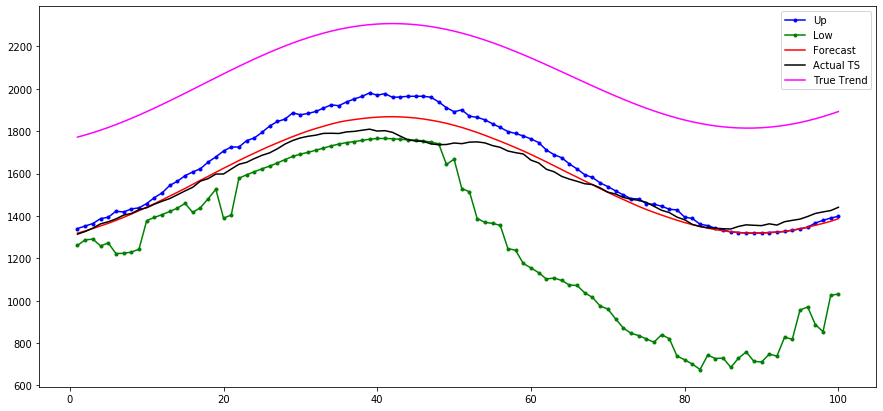

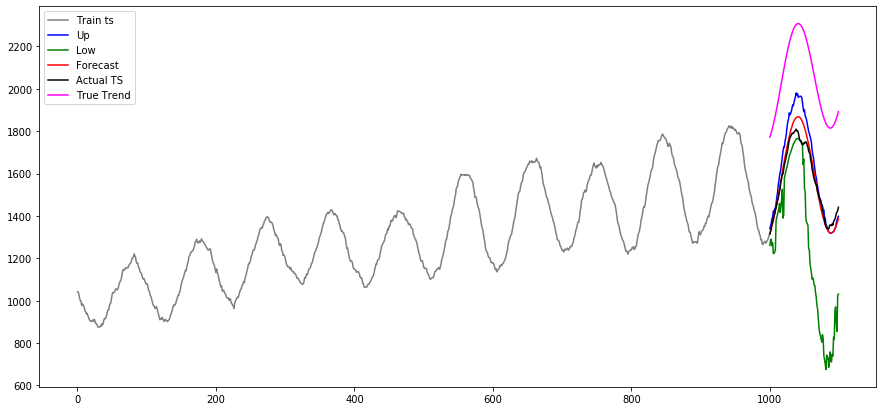

In [14]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = False,
                  plot_lower_train = False,
                  plot_ts_test = True)